In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

data = pd.read_csv('US_CO2.csv')
data['Year'] = (data["Year"] - 1800)/100
year_df = data.iloc[:,:1]
co2_df = data.iloc[:,1:]
future_df = pd.DataFrame(np.arange(301)/100, columns=['Year'])

In [100]:
# splitting data into train and test
def splitData(data, training_frac, future_pred):
    if future_pred:
        splityear = 151
        train = data.iloc[:splityear, :] # splits til year 1950
        test = data.iloc[splityear:, :]
        return train, test
    else:
        train = data.sample(frac=training_frac, random_state=1).sort_index()
        test = data.drop(train.index)
        return train, test

In [101]:
train_df, test_df = splitData(data, 0.8, future_pred=True)
year_train = train_df.iloc[:, :1]
co2_train = train_df.iloc[:, 1:]
co2_test = test_df.iloc[:, 1:]
year_test = test_df.iloc[:, :1]

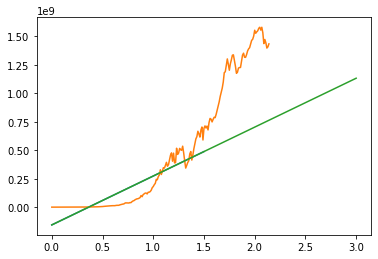

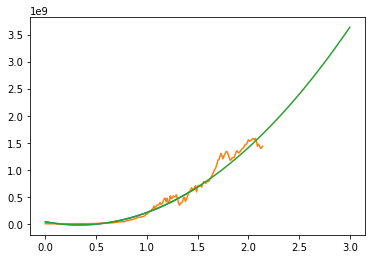

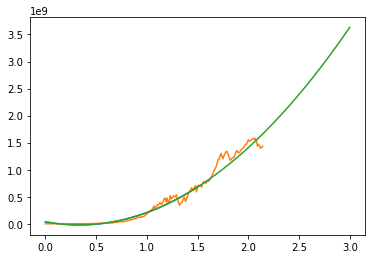

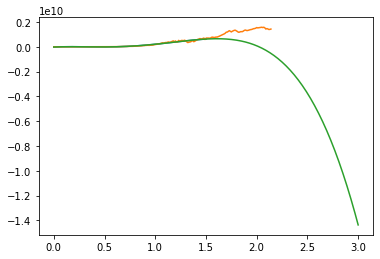

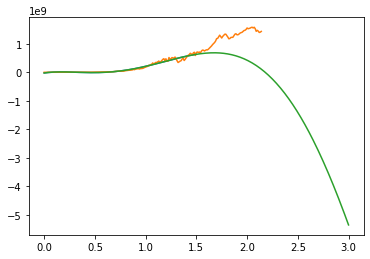

In [102]:
# testing many degrees
n_deg = 5
training_errors = []
testing_errors = []
for degree in range(2, n_deg+2):
    train = year_train.copy()
    test = year_test.copy() 
    future = future_df.copy()
    for i in range(2,degree):
        train['year^'+str(i)] = train['Year']**i
        test['year^'+str(i)] = test['Year']**i
        future['year^'+str(i)] = future['Year']**i
    linreg = LinearRegression()
    linreg.fit(train, co2_train)
    pred_train = linreg.predict(train)
    pred_test = linreg.predict(test)
    pred_future = linreg.predict(future)
    training_errors.append(mean_squared_error(co2_train, pred_train))
    testing_errors.append(mean_squared_error(co2_test, pred_test))
    plt.figure()
    plt.plot(year_train, pred_train)
    plt.plot(year_df, co2_df)
    plt.plot(future_df, pred_future)
    

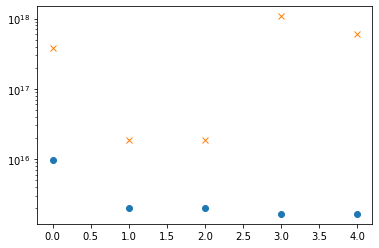

In [103]:
plt.plot(training_errors, 'o')
plt.plot(testing_errors, 'x')
plt.yscale('log')
#plt.plot(testing_errors)
plt.show()

In [104]:
print(testing_errors)

[3.817530572860347e+17, 1.882900494741396e+16, 1.8849651081275892e+16, 1.0800381082089779e+18, 6.094100012862831e+17]
